# Ultimate Texax Hold'em Simulation
## Results Visualisation

In [34]:
import os
import pandas
import re
import numpy as np
import matplotlib.pyplot as plt

In [7]:
results = os.listdir("./results")
results

['UTH_Simulation_Days10000_GamesPerDay400_BetMean100_BetStd0.csv',
 'UTH_Simulation_Days10000_GamesPerDay400_BetMean300_BetStd0.csv',
 'UTH_Simulation_Days10000_GamesPerDay400_BetMean400_BetStd0.csv',
 'UTH_Simulation_Days10000_GamesPerDay400_BetMean50_BetStd0.csv']

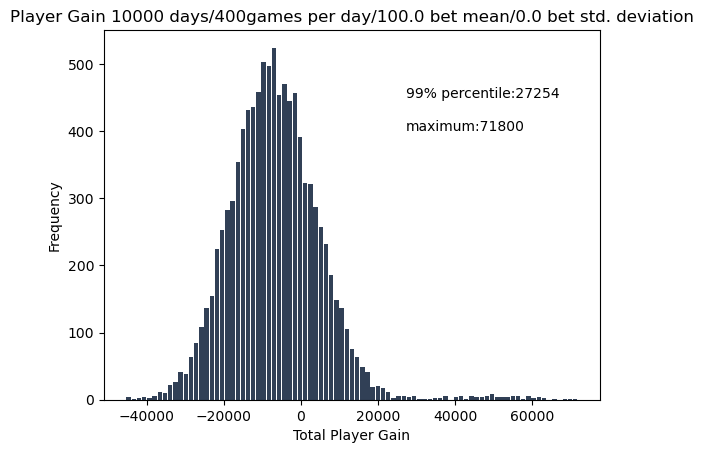

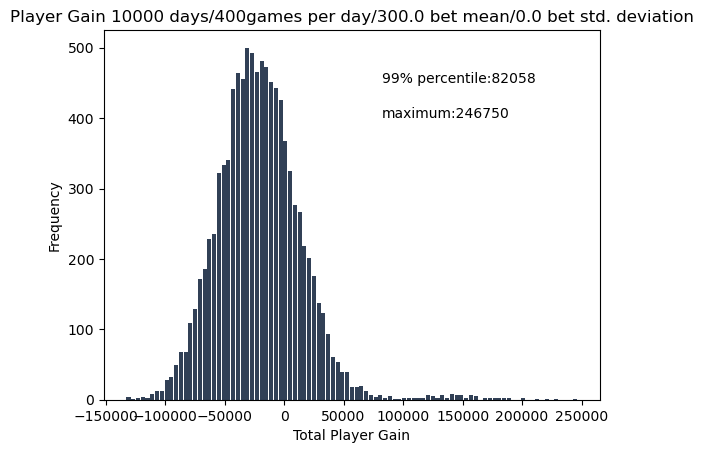

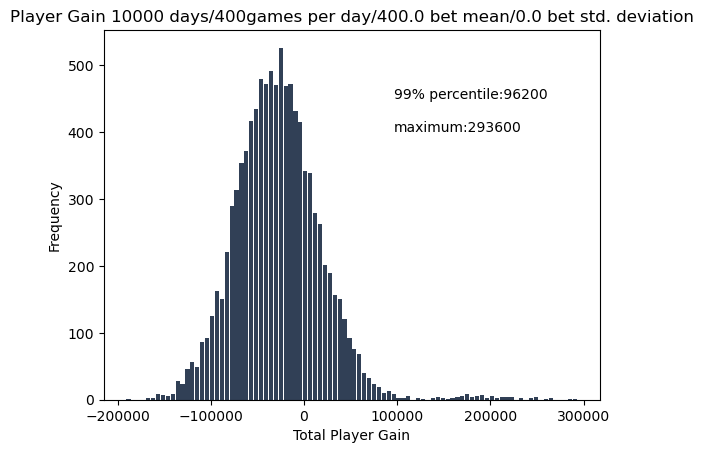

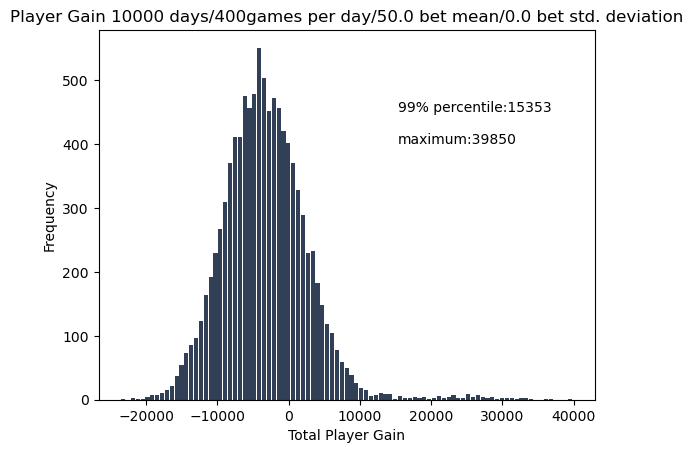

In [48]:
for cur_result_file in results:
    cur_results = pandas.read_csv(f"./results/{cur_result_file}", sep=";", header=0)
    
    # Determine simulation parameters
    sim_param_str = str.split(cur_result_file, "_")
    gaming_days = int(
        re.match(r"([a-z]+)([0-9]+)", sim_param_str[2], re.I).groups()[1]
    )
    games_per_day = int(
        re.match(r"([a-z]+)([0-9]+)", sim_param_str[3], re.I).groups()[1]
    )
    bet_mean = float(
        re.match(r"([a-z]+)([0-9]+)", sim_param_str[4], re.I).groups()[1]
    )
    bet_std = float(
        re.match(r"([a-z]+)([0-9]+)", str.split(sim_param_str[5], ".")[0], re.I).groups()[1]
    )
    
    total_gain_max = max(cur_results['PlayerTotalGain'])
    total_gain_99th = np.percentile(np.array(cur_results['PlayerTotalGain']), 99)
    
    # Visualize player gains in histogramm
    plt.figure()
    n, bins, patches = plt.hist(
        x=cur_results['PlayerTotalGain'],
        bins='auto',
        color='#1A2B44',
        alpha=0.9,
        rwidth=0.85
    )
    #plt.grid(axis='y', alpha=0.5)
    plt.xlabel("Total Player Gain")
    plt.ylabel("Frequency")
    plt.title("Player Gain " + str(gaming_days) + " days/" +
              str(games_per_day) + "games per day/" + 
              str(bet_mean) + " bet mean/" +
              str(bet_std) + " bet std. deviation")
    plt.text(total_gain_99th, 450, f"99% percentile:{round(total_gain_99th)}")
    plt.text(total_gain_99th, 400, f"maximum:{round(total_gain_max)}")
    plt.show()
    